In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
from pathlib import Path
import time

In [4]:
!unzip ImagenesCaras.zip -d caras

Archive:  ImagenesCaras.zip
   creating: caras/s1/
  inflating: caras/s1/1.pgm          
  inflating: caras/s1/10.pgm         
  inflating: caras/s1/2.pgm          
  inflating: caras/s1/3.pgm          
  inflating: caras/s1/4.pgm          
  inflating: caras/s1/5.pgm          
  inflating: caras/s1/6.pgm          
  inflating: caras/s1/7.pgm          
  inflating: caras/s1/8.pgm          
  inflating: caras/s1/9.pgm          
   creating: caras/s10/
  inflating: caras/s10/1.pgm         
  inflating: caras/s10/10.pgm        
  inflating: caras/s10/2.pgm         
  inflating: caras/s10/3.pgm         
  inflating: caras/s10/4.pgm         
  inflating: caras/s10/5.pgm         
  inflating: caras/s10/6.pgm         
  inflating: caras/s10/7.pgm         
  inflating: caras/s10/8.pgm         
  inflating: caras/s10/9.pgm         
   creating: caras/s11/
  inflating: caras/s11/1.pgm         
  inflating: caras/s11/10.pgm        
  inflating: caras/s11/2.pgm         
  inflating: caras/s11/3.pg

In [2]:
# Funcion para correr .cpp

TP = "../src/main"
TEST_DIR = "../tests/"

def run_test(test_name: str, niter: int, eps: float): 
    !{TP} {TEST_DIR + test_name} {niter} {eps}
def run_test_pca(test_name: str, niter: int, eps: float, cant: int): 
    !{TP} {TEST_DIR + test_name} {niter} {eps} {cant}

def read_result_autovalores(test_result: str):
    return pandas.read_csv(TEST_DIR + test_result + '_autovalores.out', names=["autovalores"])

def read_result_autovectores(test_result: str):
    return pandas.read_csv(TEST_DIR + test_result + '_autovectores.out' , names=["autovectores"])

### 1. Tests metodo de la potencia

In [123]:
# # CASO SIMETRICO
# A = np.array([
#   [ 7,  2,  -3],
#   [ 2,  2,  -2],
#   [-3, -2,  -2]
# ])

# # GUARDO TXT
# np.savetxt("../tests/simetrico.txt", A, delimiter=' ')

# # CORRO METODO
# run_test("simetrico.txt", 100000, 1e-21)

# # CARGO AUTOVALORES Y AUTOVECTORES
# l = np.loadtxt("../tests/simetrico.txt_autovalores.out", dtype='f', delimiter=' ')
# v = np.loadtxt("../tests/simetrico.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(3))

# print(l)
# print(v)


# print(A @ v[:, 0])
# print(l[0] * v[:,0])

# for i in range(len(A)):
#     print(i)
#     print(np.allclose(A @ v[:, i], l[i] * v[:,i], 1e-6))


In [124]:
# # CASO (A) * (A traspuesta)
# AT = A @ A.T
# TA = A.T @ A

# # GUARDO TXT
# np.savetxt("../tests/AT.txt", AT, delimiter=' ')
# np.savetxt("../tests/TA.txt", TA, delimiter=' ')

# # CORRO METODO
# run_test("AT.txt", 100000, 1e-21)
# run_test("TA.txt", 100000, 1e-21)

# # CARGO AUTOVALORES Y AUTOVECTORES
# l_AT = np.loadtxt("../tests/AT.txt_autovalores.out", dtype='f', delimiter=' ')
# v_AT = np.loadtxt("../tests/AT.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(3))

# l_TA = np.loadtxt("../tests/TA.txt_autovalores.out", dtype='f', delimiter=' ')
# v_TA = np.loadtxt("../tests/TA.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(3))

# print(l_AT)
# print(l_TA)
# print("Bingo :)" if np.allclose(l_AT,l_TA) else "Bongo :(")
# print("Bingo :)" if np.allclose(v_AT,v_TA) else "Bongo :(")

### Ej 2 Juli

### PCA

In [132]:
paths = []
imgs = []
for path in sorted(list(Path('caras').rglob('*/*.pgm'))):
    paths.append(path)
    imgs.append(plt.imread(path)[::2,::2]/255)
X = np.stack(imgs)

In [167]:
# # Correr esto solo si quiero sacar a una persona del conjunto
# primera_persona = X[:10]
# X = X[10:]


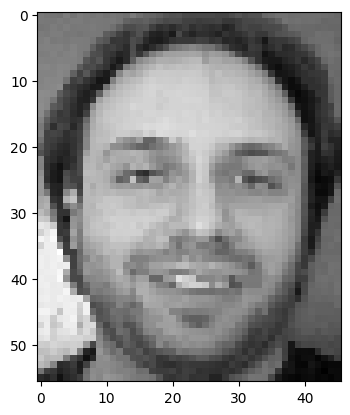

In [126]:
plt.imshow(X[0], cmap='gray');

In [133]:
start_time = time.time()

n = X.shape[0] # Cantidad de imagenes
X = X.reshape(n, -1) # X pasa a tener dimension n x (46 x 56)
X_centered = X - X.mean(0) # X.mean(0) devuelve un arreglo con la media de cada columna.
Mx = X_centered.T@X_centered/(n-1)  # Mx = Matriz de covarianza

# GUARDO TXT
#np.savetxt("../tests/pca.txt", Mx, fmt="%1.16e", delimiter=' ')

# CORRO METODO
#run_test("pca.txt", 10000, 1e-5)
#run_test_pca("pca.txt", 30000, 1e-16, 409)      # Con tolerancia 1e-16 converge rapido, con 1e-17 ya no

end_time = time.time()

# CARGO AUTOVALORES Y AUTOVECTORES
pca_420_autovalores = np.loadtxt("../tests/pca.txt_autovalores.out", dtype='f', delimiter=' ')
pca_420_autovectores = np.loadtxt("../tests/pca.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(420))

# Calcula el tiempo transcurrido
tiempo_ejecucion_pca_420 = end_time - start_time

#print(l)

In [134]:
print(tiempo_ejecucion_pca_420) 
pca_409_autovalores = np.loadtxt("../tests/pca.txt_autovalores.out", dtype='f', delimiter=' ')
pca_409_autovectores = np.loadtxt("../tests/pca.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(409))

0.04287600517272949


In [127]:
pca_420_autovalores = np.loadtxt("../tests/pca.txt_autovalores.out", dtype='f', delimiter=' ')
pca_420_autovectores = np.loadtxt("../tests/pca.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(420))

### 2) b) PCA

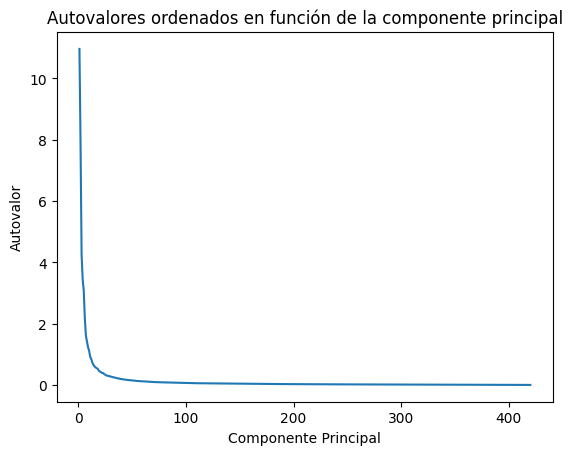

In [ ]:
# Grafico los autovalores ordenados en función de las componentes principales
plt.plot(np.arange(1, len(pca_420_autovalores) + 1), pca_420_autovalores)
plt.xlabel('Componente Principal')
plt.ylabel('Autovalor')
plt.title('Autovalores ordenados en función de la componente principal')
plt.show()

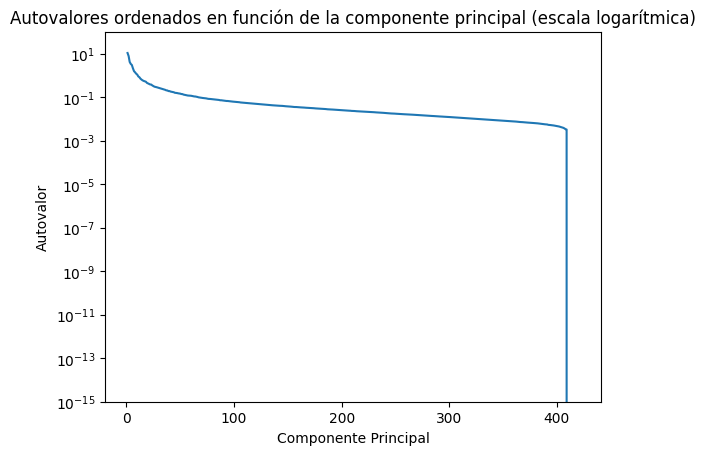

In [ ]:
# Grafico los autovalores ordenados en función de las componentes principales
plt.semilogy(np.arange(1, len(pca_420_autovalores) + 1), pca_420_autovalores)
plt.xlabel('Componente Principal')
plt.ylabel('Autovalor')
plt.yscale('log')
plt.title('Autovalores ordenados en función de la componente principal (escala logarítmica)')
plt.ylim(bottom=1e-15, top=1e2) 
plt.show()

### 2) c)

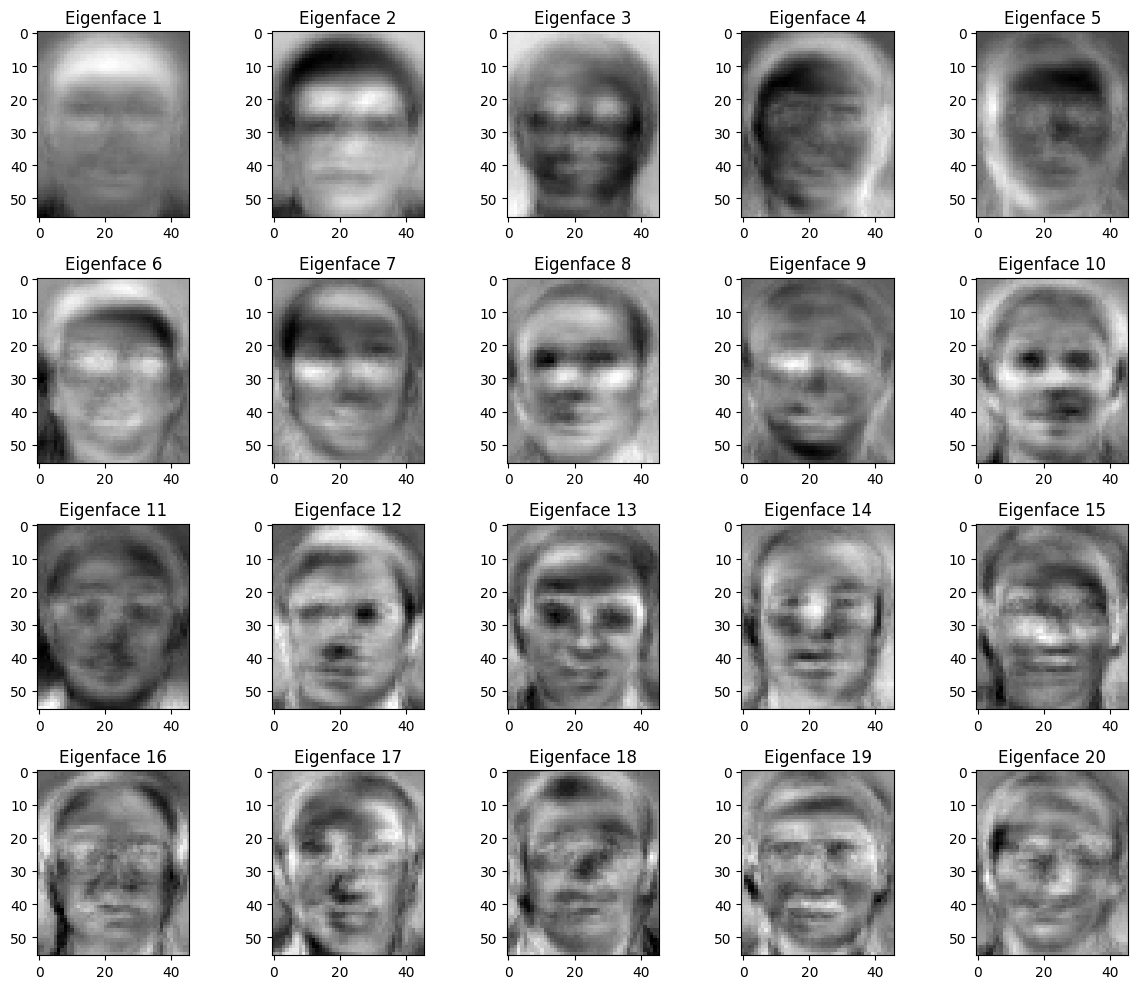

In [ ]:
# Obtengo los primeros 20 autovectores correspondientes a los autovalores más grandes
num_eigenfaces = 20
eigenfaces = pca_420_autovectores[:, :num_eigenfaces]

# Normalizo las eigenfaces
eigenfaces /= np.linalg.norm(eigenfaces, axis=0)

fig, axes = plt.subplots(4, 5, figsize=(12, 10))
axes = axes.ravel()

for i in range(num_eigenfaces):
    eigenface = eigenfaces[:, i].reshape(56, 46)
    axes[i].imshow(eigenface, cmap='gray')
    axes[i].set_title(f'Eigenface {i+1}')

plt.tight_layout()
plt.show()

### 2) d) PCA

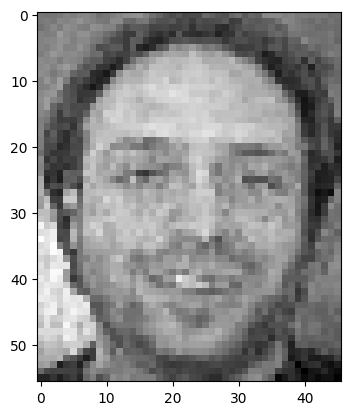

In [ ]:
paths = []
imgs = []
for path in sorted(list(Path('caras').rglob('*/*.pgm'))):
    paths.append(path)
    imgs.append(plt.imread(path)[::2,::2]/255)
X = np.stack(imgs)


# # Imagen original
# plt.imshow(X[0], cmap='gray')


# Obtengo las primeras k componentes principales
k = 408  # Número deseado de componentes principales
componentes_principales = pca_420_autovectores[:, :k]

# Proyecto la imagen original en el espacio de menor dimension
z = componentes_principales.T @ X[0].flatten() # X_centered o X normal?

# # Reconstruyo la imagen a partir de las k componentes principales
imagen_reconstruida = componentes_principales @ z

# # Reshape de la imagen reconstruida a la forma original
imagen_reconstruida = imagen_reconstruida.reshape(X[0].shape)

plt.imshow(imagen_reconstruida, cmap='gray')
plt.show()

In [159]:
# NORMA DE FROBENIUS
paths = []
imgs = []
for path in sorted(list(Path('caras').rglob('*/*.pgm'))):
    paths.append(path)
    imgs.append(plt.imread(path)[::2,::2]/255)
X = np.stack(imgs)

lista_de_suma_de_normas_pca = []
lista_de_promedio_de_normas_pca = []

ks = [50, 100, 200, 300, 408]

for k in ks:
    # Obtengo las primeras k componentes principales
    componentes_principales = pca_420_autovectores[:, :k]

    lista_de_normas_pca = []
    for i in range(10):
        # Proyecto la imagen original en el espacio de menor dimension
        z = componentes_principales.T @ X[i].flatten() # X_centered o X normal?

        # # Reconstruyo la imagen a partir de las k componentes principales
        imagen_reconstruida = componentes_principales @ z
        imagen_reconstruida = imagen_reconstruida.reshape(X[0].shape)
        norma_frobenius = np.linalg.norm(X[i] - imagen_reconstruida, 'fro')
        lista_de_normas_pca.append(norma_frobenius)
        

    # # Reshape de la imagen reconstruida a la forma original
    #imagen_reconstruida = imagen_reconstruida.reshape(X[0].shape)
    suma_de_normas_pca = np.sum(lista_de_normas_pca)
    promedio_de_normas_pca = suma_de_normas_pca / len(lista_de_normas_pca)
    lista_de_suma_de_normas_pca.append(suma_de_normas_pca)
    lista_de_promedio_de_normas_pca.append(promedio_de_normas_pca)


print(lista_de_suma_de_normas_pca)
print(lista_de_promedio_de_normas_pca)




[50.65400726701334, 40.28048311862032, 31.584541730310427, 27.182555490787614, 23.951407235448972]
[5.065400726701334, 4.028048311862031, 3.1584541730310427, 2.718255549078761, 2.3951407235448974]


In [170]:
# NORMA DE FROBENIUS PERSONA FUERA DEL CONJUNTO
# HASTA 408 PARA SIMPLIFICAR EL GRAFICO

lista_de_suma_de_normas_pca = []
lista_de_promedio_de_normas_pca = []

ks = [50, 100, 200, 300, 408]

for k in ks:
    # Obtengo las primeras k componentes principales
    componentes_principales = pca_420_autovectores[:, :k]

    lista_de_normas_pca = []
    for i in range(10): # SON 10 IMAGENES LAS DE INTERES
        # Proyecto la imagen original en el espacio de menor dimension
        z = componentes_principales.T @ primera_persona[i].flatten() # X_centered o X normal?

        # # Reconstruyo la imagen a partir de las k componentes principales
        imagen_reconstruida = componentes_principales @ z
        imagen_reconstruida = imagen_reconstruida.reshape(primera_persona[0].shape)
        norma_frobenius = np.linalg.norm(primera_persona[i] - imagen_reconstruida, 'fro')
        lista_de_normas_pca.append(norma_frobenius)
        

    # # Reshape de la imagen reconstruida a la forma original
    #imagen_reconstruida = imagen_reconstruida.reshape(X[0].shape)
    suma_de_normas_pca = np.sum(lista_de_normas_pca)
    promedio_de_normas_pca = suma_de_normas_pca / len(lista_de_normas_pca)
    lista_de_suma_de_normas_pca.append(suma_de_normas_pca)
    lista_de_promedio_de_normas_pca.append(promedio_de_normas_pca)


print(lista_de_suma_de_normas_pca)
print(lista_de_promedio_de_normas_pca)




[50.65400726701334, 40.28048311862032, 31.584541730310427, 27.182555490787614, 23.951407235448972]
[5.065400726701334, 4.028048311862031, 3.1584541730310427, 2.718255549078761, 2.3951407235448974]


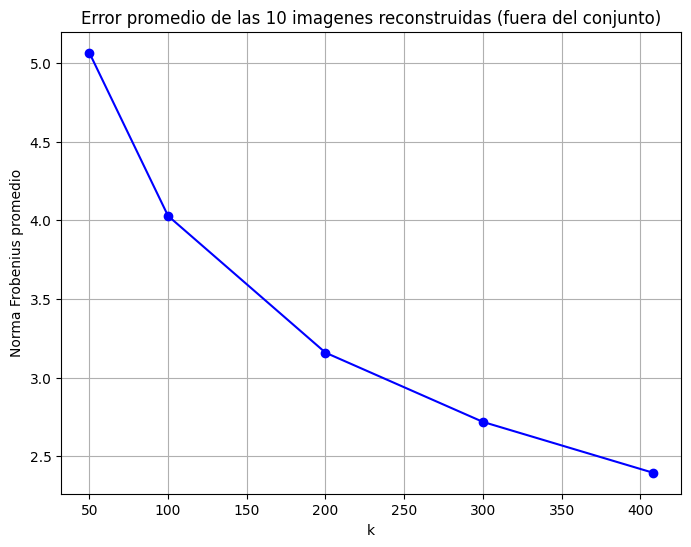

In [171]:
plt.figure(figsize=(8, 6))
plt.plot(ks, lista_de_promedio_de_normas_pca, 'bo-')
plt.xlabel('k')
plt.ylabel('Norma Frobenius promedio')
plt.title('Error promedio de las 10 imagenes reconstruidas (fuera del conjunto)')
plt.grid(True)
plt.show()

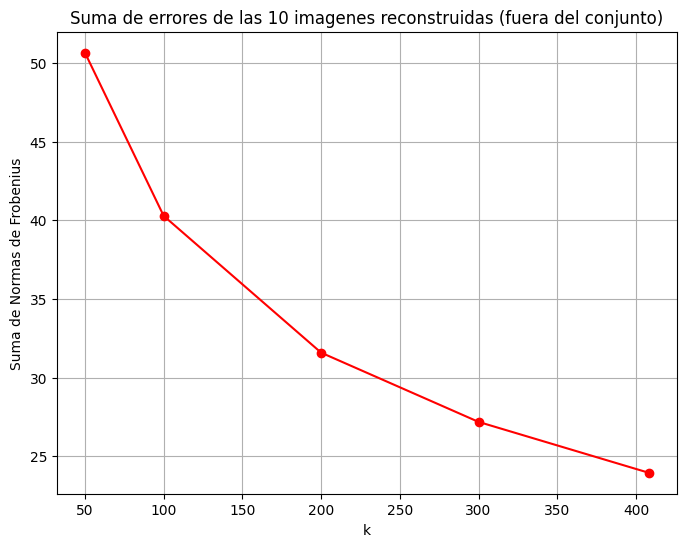

In [172]:
plt.figure(figsize=(8, 6))
plt.plot(ks, lista_de_suma_de_normas_pca, 'ro-')
plt.xlabel('k')
plt.ylabel('Suma de Normas de Frobenius')
plt.title('Suma de errores de las 10 imagenes reconstruidas (fuera del conjunto)')
plt.grid(True)
plt.show()

### 3a) PCA

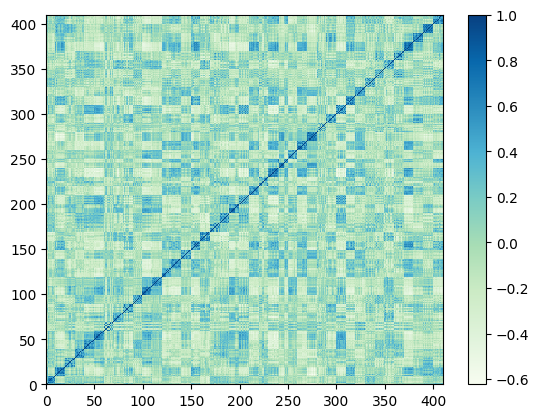

In [ ]:
plt.pcolor(np.corrcoef(X_centered), cmap='GnBu')
plt.colorbar()


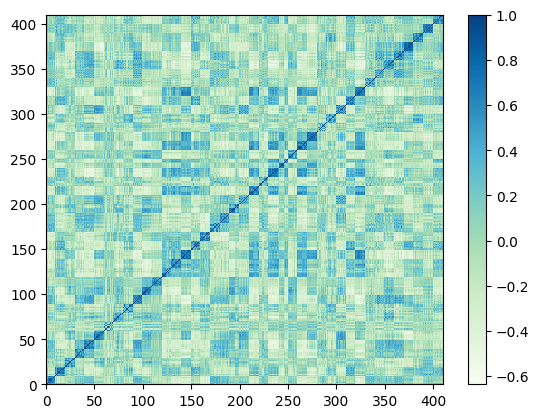

In [93]:
paths = []
imgs = []
for path in sorted(list(Path('caras').rglob('*/*.pgm'))):
    paths.append(path)
    imgs.append(plt.imread(path)[::2,::2]/255)
X = np.stack(imgs)


imgs_k = []

k = 408  # componentes principales
componentes_principales = pca_420_autovectores[:, :k]

# Proyecto la imagen original en el espacio de menor dimension
for i in range(X.shape[0]):
    z = componentes_principales.T @ X_centered[i].flatten()
    imgs_k.append(z)
X_k = np.stack(imgs_k)

plt.pcolor(np.corrcoef(X_k), cmap='GnBu')
plt.colorbar()

### 3) b) PCA

In [136]:
# 3B) PROMEDIO DIFERENTE PERSONA
paths = []
imgs = []
for path in sorted(list(Path('caras').rglob('*/*.pgm'))):
    paths.append(path)
    imgs.append(plt.imread(path)[::2,::2]/255)
X = np.stack(imgs)

cant_imagenes = X.shape[0] # Cantidad de imagenes
#X = X.reshape(n, -1) # X pasa a tener dimension n x (112 x 96)
X_centered = X - X.mean(0) # X.mean(0) devuelve un arreglo con la media de cada columna.

# =============================#

# k = 46  # componentes principales (puedo probar con varias)
# componentes_principales = twodpca_autovectores[:, :k]

imgs_k = []
promedios_simil = []

# Mascara
A = np.ones((410, 410))
for i in range(0, 41):
    A[i*10:i*10+10, i*10:i*10+10] = 0

# Pruebo con k componentes diferentes
for k in range (1, 409):
    componentes_principales = pca_420_autovectores[:, :k]
    for i in range(cant_imagenes):
        z = componentes_principales.T @ X_centered[i].flatten()
        z = z.flatten()
        imgs_k.append(z)
    X_k = np.stack(imgs_k)
    imgs_k = []
    mat_simil = np.corrcoef(X_k)
    mat_simil_mascara = mat_simil * A   # Aplico mascara
    suma = np.sum(mat_simil_mascara)
    promedio = suma/((410 * 410) - (410 * 10))
    promedios_simil.append(promedio)
    

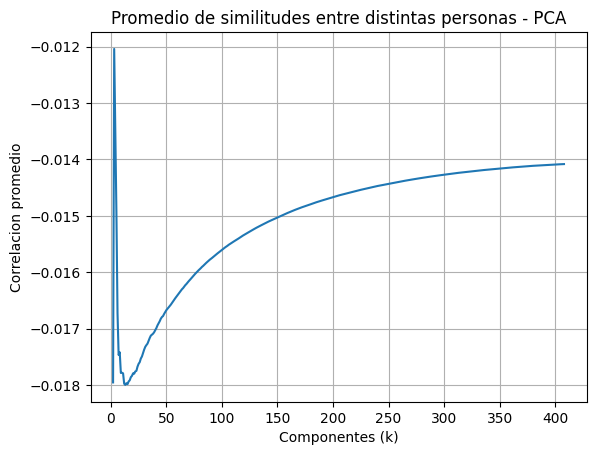

In [137]:
# Tiene sentido que se vaya acercando al 0, los saltos al principio son raros.

plt.plot(range (1, 409), promedios_simil)
plt.xlabel('Componentes (k)')
plt.ylabel('Correlacion promedio')
plt.title('Promedio de similitudes entre distintas personas - PCA')
plt.grid(True)
plt.show()

In [138]:
# 3B) PROMEDIO MISMA PERSONA

paths = []
imgs = []
for path in sorted(list(Path('caras').rglob('*/*.pgm'))):
    paths.append(path)
    imgs.append(plt.imread(path)[::2,::2]/255)
X = np.stack(imgs)

cant_imagenes = X.shape[0] # Cantidad de imagenes
#X = X.reshape(n, -1) # X pasa a tener dimension n x (112 x 96)
X_centered = X - X.mean(0) # X.mean(0) devuelve un arreglo con la media de cada columna.

# =============================#

# k = 46  # componentes principales (puedo probar con varias)
# componentes_principales = twodpca_autovectores[:, :k]

imgs_k = []
promedios_simil = []

# Mascara (ahora con trues en la diagonal)
A = np.zeros((410, 410))
for i in range(0, 41):
    A[i*10:i*10+10, i*10:i*10+10] = 1

# Pruebo con k componentes diferentes
for k in range (1, 409):
    componentes_principales = pca_420_autovectores[:, :k]
    for i in range(cant_imagenes):
        z = componentes_principales.T @ X_centered[i].flatten()
        z = z.flatten()
        imgs_k.append(z)
    X_k = np.stack(imgs_k)
    imgs_k = []
    mat_simil = np.corrcoef(X_k)
    mat_simil_mascara = mat_simil * A   # Aplico mascara
    suma = np.sum(mat_simil_mascara)
    promedio = suma/(410 * 10)
    promedios_simil.append(promedio)

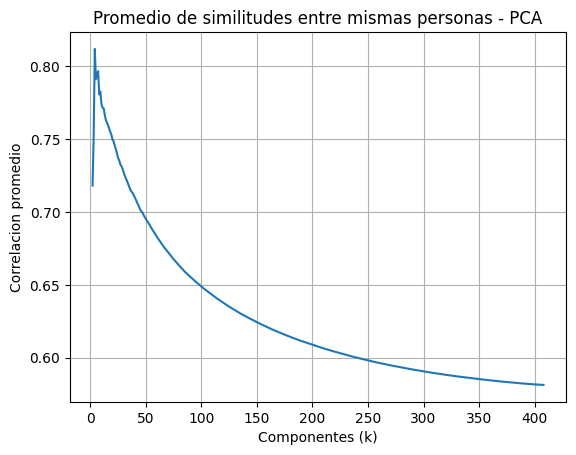

In [139]:
# Resultado raro, pero quiza tiene sentido
# Al tener pocas componentes, es mas dificil diferenciar fotos de una misma persona, por ende su correlacion es mas alta.
# Al acercarse, la similitud promedio sigue estando arriba de 0.575, por lo que indica que hay correlacion dentro de todo alta
# CONSULTAR

plt.plot(range (1, 409), promedios_simil)
plt.xlabel('Componentes (k)')
plt.ylabel('Correlacion promedio')
plt.title('Promedio de similitudes entre mismas personas - PCA')
plt.grid(True)
plt.show()

### =======================================================================================

### 2DPCA

In [112]:
paths = []
imgs = []
for path in sorted(list(Path('caras').rglob('*/*.pgm'))):
    paths.append(path)
    imgs.append(plt.imread(path)[::2,::2]/255)
X = np.stack(imgs)

La variante 2DPCA 2 considera una imagen en su espacio original como una matriz A ∈ Ra×b
y le asocia un feature vector Y ∈ Ra, mediante la transformacion lineal Y = AX siendo
X ∈ Rb el vector que maximiza la dispersion de los features vectors obtenidos para todo el
conjunto de imagenes. Se puede ver que la eleccion  ́optima para el vector de proyeccion X
se corresponde con el autovector de maximo autovalor de la denominada image covariance
matrix

In [186]:
# # Correr esto solo si quiero sacar a una persona del conjunto
# primera_persona = X[:10]
# X = X[10:]


In [113]:
print(f"Tengo {X.shape[0]} imagenes de tamano {X.shape[1]}x{X.shape[2]}")


start_time = time.time()
# A es la imagen
imgs = X

n = imgs.shape[0] # Cantidad de imagenes

A_prom = np.zeros(shape=(imgs.shape[1], imgs.shape[2]))

for i in range (n):
    A_prom += imgs[i]

A_prom /= n

# G = image covariance matrix (quiero calcularle autovalores y autovectores)
suma = 0
for j in range (n): 
    suma += ((np.transpose(imgs[j] - A_prom)) @ (imgs[j] - A_prom))
G = (1/n) * suma

# GUARDO TXT
np.savetxt("../tests/2dpca_g.txt", G, delimiter=' ')

# # CORRO METODO
run_test("2dpca_g.txt", 100000, 1e-21)
end_time = time.time()

# Calcula el tiempo transcurrido
tiempo_ejecucion_2dpca = end_time - start_time

Tengo 410 imagenes de tamano 56x46
Corriendo el programa...
autovalor: 0
frene en iteracion: 100000
valor = 24.336
autovalor: 1
frene en iteracion: 100000
valor = 9.22444
autovalor: 2
frene en iteracion: 100000
valor = 5.51641
autovalor: 3
frene en iteracion: 100000
valor = 3.58365
autovalor: 4
frene en iteracion: 100000
valor = 2.56006
autovalor: 5
frene en iteracion: 100000
valor = 2.27905
autovalor: 6
frene en iteracion: 100000
valor = 1.89894
autovalor: 7
frene en iteracion: 100000
valor = 1.51019
autovalor: 8
frene en iteracion: 100000
valor = 1.22432
autovalor: 9
frene en iteracion: 100000
valor = 0.912122
autovalor: 10
frene en iteracion: 100000
valor = 0.817493
autovalor: 11
frene en iteracion: 100000
valor = 0.69328
autovalor: 12
frene en iteracion: 100000
valor = 0.598931
autovalor: 13
frene en iteracion: 100000
valor = 0.540598
autovalor: 14
frene en iteracion: 100000
valor = 0.500033
autovalor: 15
frene en iteracion: 100000
valor = 0.418575
autovalor: 16
frene en iteracion:

In [142]:
print(tiempo_ejecucion_2dpca)

1.9074888229370117


In [114]:
# Cargo autovalores y autovectores

twodpca_autovalores = np.loadtxt("../tests/2dpca_g.txt_autovalores.out", dtype='f', delimiter=' ')
twodpca_autovectores = np.loadtxt("../tests/2dpca_g.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(G.shape[0]))
twodpca_autovalores_transpose = twodpca_autovectores

# normalizo cada autovector
num_autovectores = twodpca_autovectores.shape[1]
for i in range(num_autovectores):
    norm = np.linalg.norm(twodpca_autovectores[:, i])
    twodpca_autovectores[:, i] /= norm

### 2) b) 2DPCA


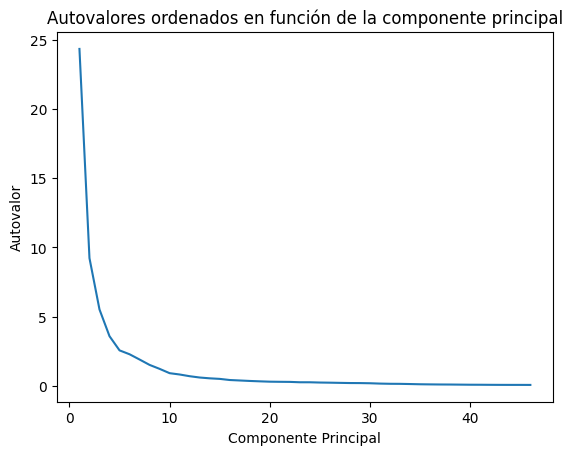

In [35]:
# Grafico los autovalores ordenados en función de las componentes principales
plt.plot(np.arange(1, len(twodpca_autovalores) + 1), twodpca_autovalores)
plt.xlabel('Componente Principal')
plt.ylabel('Autovalor')
plt.title('Autovalores ordenados en función de la componente principal')
plt.show()

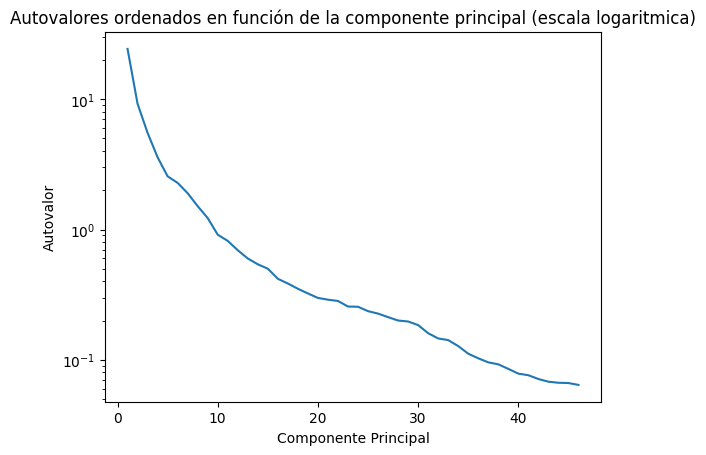

In [37]:
# Grafico los autovalores ordenados en función de las componentes principales
plt.plot(np.arange(1, len(twodpca_autovalores) + 1), twodpca_autovalores)
plt.xlabel('Componente Principal')
plt.ylabel('Autovalor')
plt.yscale('log')
plt.title('Autovalores ordenados en función de la componente principal (escala logaritmica)')
plt.show()

### 2) c) 2DPCA

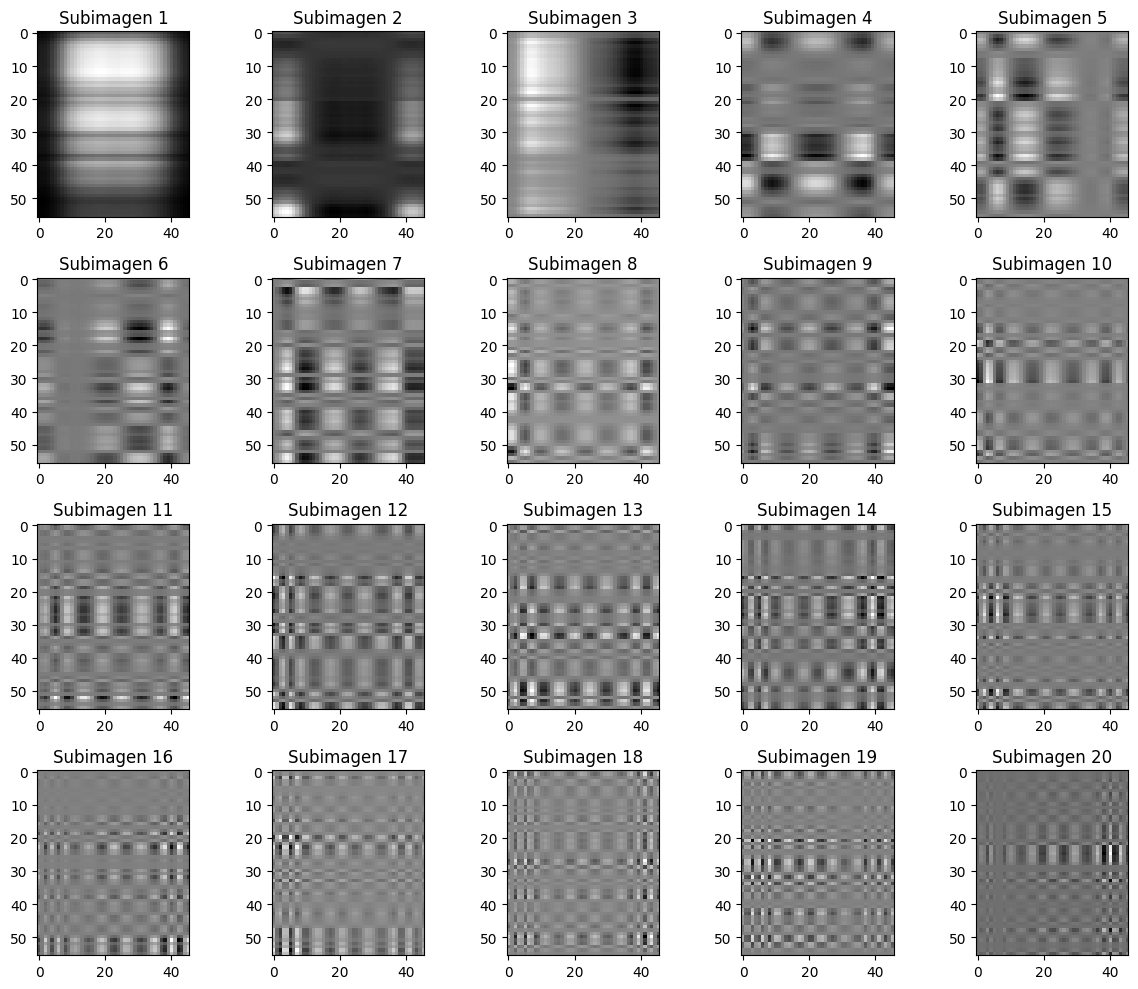

In [40]:
# Obtengo los primeros 20 autovectores correspondientes a los autovalores más grandes
# num_eigenfaces = 20
# eigenfaces = v_G[:, :num_eigenfaces]
eigenvectors = twodpca_autovectores
k = 409

# feat_vecs de cada imagen
feature_vectors = imgs[0] @ twodpca_autovectores[0]
# Son equivalentes estas dos
# A = imgs[x]
#A = feature_vectors @ (v_G.T)


# Normalizo las eigenfaces
eigenvectors /= np.linalg.norm(eigenvectors, axis=0)
#eigenvectors = np.transpose(eigenvectors)

producto_externo = []

n = 20

for i in range(n):

    Y_j = imgs[50] @ twodpca_autovectores[:,i]
    X_j = twodpca_autovectores[:,i].T
    producto_externo.append(np.outer(Y_j, X_j))

fig, axes = plt.subplots(4, 5, figsize=(12, 10))
axes = axes.ravel()

for i in range(n):
    subimg = producto_externo[i]
    axes[i].imshow(subimg, cmap='gray')
    axes[i].set_title(f'Subimagen {i+1}')

plt.tight_layout()
plt.show()

#producto interno de feature vector con autovector (pagina 4)


### 2) d) 2DPCA

4.365559621768901e-06


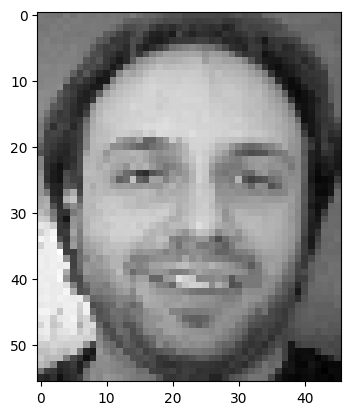

In [144]:
# feat_vecs de cada imagen
feature_vectors = imgs[0] @ twodpca_autovectores
# Son equivalentes estas dos
# A = imgs[x]
A = feature_vectors @ (twodpca_autovectores.T)

# Luego, el producto de arriba se puede descomponer como el producto externo
# Aca entran las k componentes.
k = 46

A_2 = np.zeros_like(A)
for j in range(k):
    A_2 += np.outer(feature_vectors[:,j], (twodpca_autovectores[:,j]).T)

print(np.linalg.norm(X[0] - A_2, 'fro'))

plt.imshow(A_2, cmap='gray')
plt.show()

In [118]:
# NORMA DE FROBENIUS SACANDO UNA CARA:

paths = []
imgs = []
for path in sorted(list(Path('caras').rglob('*/*.pgm'))):
    paths.append(path)
    imgs.append(plt.imread(path)[::2,::2]/255)
X = np.stack(imgs)



(410, 56, 46)
(400, 56, 46)


In [146]:
# NORMA DE FROBENIUS
paths = []
imgs = []
for path in sorted(list(Path('caras').rglob('*/*.pgm'))):
    paths.append(path)
    imgs.append(plt.imread(path)[::2,::2]/255)
X = np.stack(imgs)

lista_de_suma_de_normas_2dpca = []
lista_de_promedio_de_normas_2dpca = []

ks = [1, 5, 10, 23, 46]

for k in ks:
    lista_de_normas_2dpca = []
    for i in range(10):
        feature_vectors = imgs[i] @ twodpca_autovectores
        A_2 = np.zeros_like(X[0])
        for j in range(k):
            A_2 += np.outer(feature_vectors[:,j], (twodpca_autovectores[:,j]).T)

        norma_frobenius = np.linalg.norm(X[i] - A_2, 'fro')
        lista_de_normas_2dpca.append(norma_frobenius)

    suma_de_normas_2dpca = np.sum(lista_de_normas_2dpca)
    promedio_de_normas_2dpca = suma_de_normas_2dpca / len(lista_de_normas_2dpca)
    lista_de_suma_de_normas_2dpca.append(suma_de_normas_2dpca)
    lista_de_promedio_de_normas_2dpca.append(promedio_de_normas_2dpca)


print(lista_de_suma_de_normas_2dpca)
print(lista_de_promedio_de_normas_2dpca)




[3481.6697209424706, 1719.8894847625713, 1213.9747057585878, 699.3845446878404, 0.0015629041251551733]
[8.491877368152368, 4.19485240185993, 2.9609139164843605, 1.7058159626532692, 3.811961280866276e-06]


In [188]:
# NORMA DE FROBENIUS PARA 10 IMAGENES FUERA DEL CONJUNTO
primera_persona = X[:10]    # Imagen original (no esta dentro del conjunto)


lista_de_suma_de_normas_2dpca = []
lista_de_promedio_de_normas_2dpca = []

ks = [1, 5, 10, 23, 46]

for k in ks:
    lista_de_normas_2dpca = []
    for i in range(10): # son 10 imagenes
        feature_vectors = imgs[i] @ twodpca_autovectores
        A_2 = np.zeros_like(primera_persona[0])
        for j in range(k):
            A_2 += np.outer(feature_vectors[:,j], (twodpca_autovectores[:,j]).T)

        norma_frobenius = np.linalg.norm(primera_persona[i] - A_2, 'fro')
        lista_de_normas_2dpca.append(norma_frobenius)

    suma_de_normas_2dpca = np.sum(lista_de_normas_2dpca)
    promedio_de_normas_2dpca = suma_de_normas_2dpca / len(lista_de_normas_2dpca)
    lista_de_suma_de_normas_2dpca.append(suma_de_normas_2dpca)
    lista_de_promedio_de_normas_2dpca.append(promedio_de_normas_2dpca)


print(lista_de_suma_de_normas_2dpca)
print(lista_de_promedio_de_normas_2dpca)




[75.92448849453349, 41.944673238228425, 28.26510542621643, 16.211447445310288, 3.7603263381316233e-05]
[7.5924488494533495, 4.194467323822843, 2.826510542621643, 1.6211447445310287, 3.7603263381316233e-06]


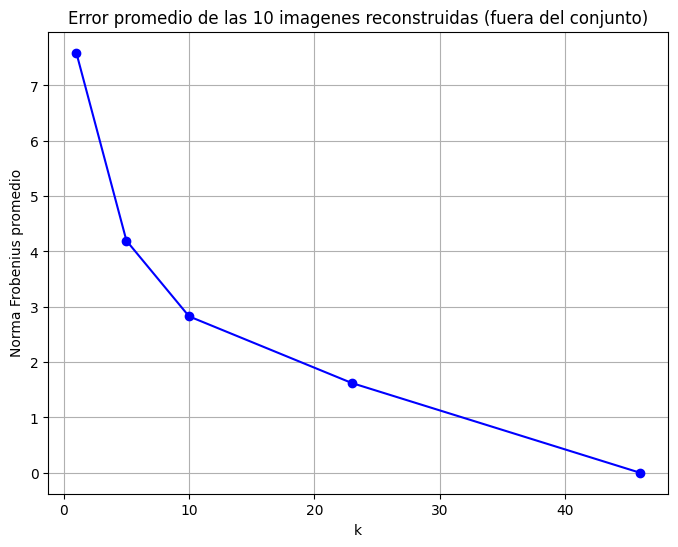

In [189]:
plt.figure(figsize=(8, 6))
plt.plot(ks, lista_de_promedio_de_normas_2dpca, 'bo-')
plt.xlabel('k')
plt.ylabel('Norma Frobenius promedio')
plt.title('Error promedio de las 10 imagenes reconstruidas (fuera del conjunto)')
plt.grid(True)
plt.show()

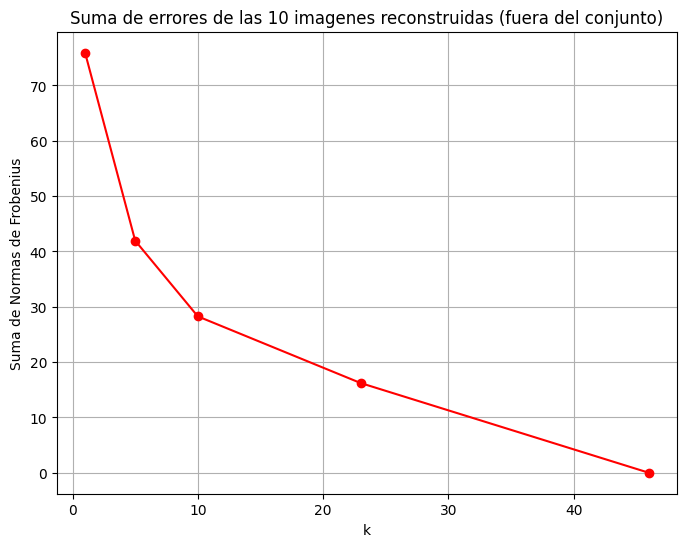

In [190]:

plt.figure(figsize=(8, 6))
plt.plot(ks, lista_de_suma_de_normas_2dpca, 'ro-')
plt.xlabel('k')
plt.ylabel('Suma de Normas de Frobenius')
plt.title('Suma de errores de las 10 imagenes reconstruidas (fuera del conjunto)')
plt.grid(True)
plt.show()

### 3a) 2DPCA

0.017749617467720365

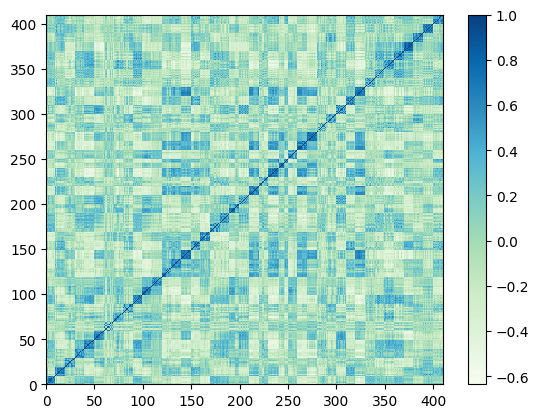

In [68]:
paths = []
imgs = []
for path in sorted(list(Path('caras').rglob('*/*.pgm'))):
    paths.append(path)
    imgs.append(plt.imread(path)[::2,::2]/255)
X = np.stack(imgs)

n = X.shape[0] # Cantidad de imagenes
#X = X.reshape(n, -1) # X pasa a tener dimension n x (112 x 96)
X_centered = X - X.mean(0) # X.mean(0) devuelve un arreglo con la media de cada columna.


imgs_k = []

k = 46  # componentes principales (puedo probar con varias)
componentes_principales = twodpca_autovectores[:, :k]

# Proyecto la imagen original en el espacio de menor dimension
for i in range(n):
    z = X_centered[i] @ componentes_principales
    z = z.flatten()
    imgs_k.append(z)
X_k = np.stack(imgs_k)

plt.pcolor(np.corrcoef(X_k), cmap='GnBu')
plt.colorbar()

### 3) B) 2DPCA

In [121]:
# 3B) PROMEDIO DIFERENTE PERSONA
paths = []
imgs = []
for path in sorted(list(Path('caras').rglob('*/*.pgm'))):
    paths.append(path)
    imgs.append(plt.imread(path)[::2,::2]/255)
X = np.stack(imgs)

cant_imagenes = X.shape[0] # Cantidad de imagenes
#X = X.reshape(n, -1) # X pasa a tener dimension n x (112 x 96)
X_centered = X - X.mean(0) # X.mean(0) devuelve un arreglo con la media de cada columna.

# =============================#

# k = 46  # componentes principales (puedo probar con varias)
# componentes_principales = twodpca_autovectores[:, :k]

imgs_k = []
promedios_simil = []

# Mascara
A = np.ones((410, 410))
for i in range(0, 41):
    A[i*10:i*10+10, i*10:i*10+10] = 0

# Pruebo con k componentes diferentes
for k in range (1, 47):
    componentes_principales = twodpca_autovectores[:, :k]
    for i in range(cant_imagenes):
        z = X_centered[i] @ componentes_principales
        z = z.flatten()
        imgs_k.append(z)
    X_k = np.stack(imgs_k)
    imgs_k = []
    mat_simil = np.corrcoef(X_k)
    mat_simil_mascara = mat_simil * A   # Aplico mascara
    suma = np.sum(mat_simil_mascara)
    promedio = suma/((410 * 410) - (410 * 10))
    promedios_simil.append(promedio)

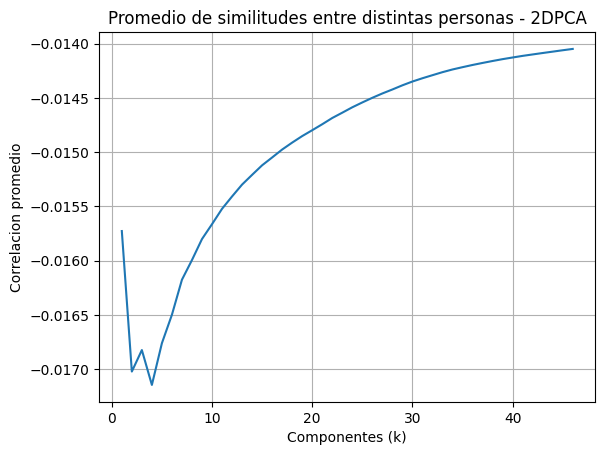

In [122]:
# Tiene sentido que se vaya acercando al 0, los saltos al principio son raros.

plt.plot(range (1, 47), promedios_simil)
plt.xlabel('Componentes (k)')
plt.ylabel('Correlacion promedio')
plt.title('Promedio de similitudes entre distintas personas - 2DPCA')
plt.grid(True)
plt.show()

In [123]:
# 3B) PROMEDIO MISMA PERSONA

paths = []
imgs = []
for path in sorted(list(Path('caras').rglob('*/*.pgm'))):
    paths.append(path)
    imgs.append(plt.imread(path)[::2,::2]/255)
X = np.stack(imgs)

cant_imagenes = X.shape[0] # Cantidad de imagenes
#X = X.reshape(n, -1) # X pasa a tener dimension n x (112 x 96)
X_centered = X - X.mean(0) # X.mean(0) devuelve un arreglo con la media de cada columna.

# =============================#

# k = 46  # componentes principales (puedo probar con varias)
# componentes_principales = twodpca_autovectores[:, :k]

imgs_k = []
promedios_simil = []

# Mascara (ahora con trues en la diagonal)
A = np.zeros((410, 410))
for i in range(0, 41):
    A[i*10:i*10+10, i*10:i*10+10] = 1

# Pruebo con k componentes diferentes
for k in range (1, 47):
    componentes_principales = twodpca_autovectores[:, :k]
    for i in range(cant_imagenes):
        z = X_centered[i] @ componentes_principales
        z = z.flatten()
        imgs_k.append(z)
    X_k = np.stack(imgs_k)
    imgs_k = []
    mat_simil = np.corrcoef(X_k)
    mat_simil_mascara = mat_simil * A   # Aplico mascara
    suma = np.sum(mat_simil_mascara)
    promedio = suma/(410 * 10)
    promedios_simil.append(promedio)

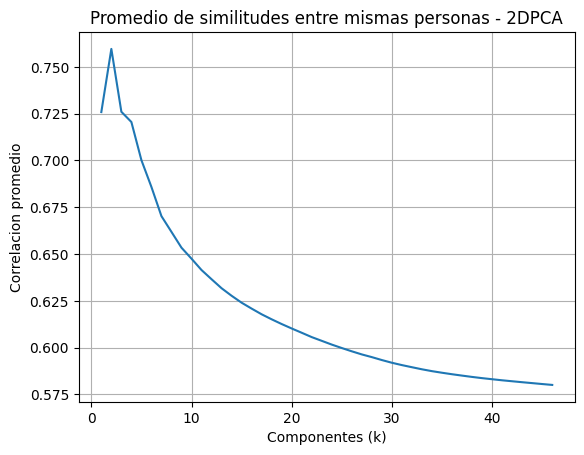

In [124]:
# Resultado raro, pero quiza tiene sentido
# Al tener pocas componentes, es mas dificil diferenciar fotos de una misma persona, por ende su correlacion es mas alta.
# Al acercarse, la similitud promedio sigue estando arriba de 0.575, por lo que indica que hay correlacion dentro de todo alta
# CONSULTAR

plt.plot(range (1, 47), promedios_simil)
plt.xlabel('Componentes (k)')
plt.ylabel('Correlacion promedio')
plt.title('Promedio de similitudes entre mismas personas - 2DPCA')
plt.grid(True)
plt.show()